In [211]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [212]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [213]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

子目录或文件 -p 已经存在。
处理: -p 时出错。
子目录或文件 input 已经存在。
处理: input 时出错。
子目录或文件 -p 已经存在。
处理: -p 时出错。
子目录或文件 outputs 已经存在。
处理: outputs 时出错。


# Generator

In [214]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [215]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [216]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [217]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [218]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [219]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [220]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [221]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [222]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [223]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:08, 14.14it/s]                         


Epoch 1 of 100
Generator loss: 1.40028309, Discriminator loss: 0.94030315


118it [00:08, 14.21it/s]                         


Epoch 2 of 100
Generator loss: 2.84382474, Discriminator loss: 1.42818996


118it [00:08, 14.09it/s]                         


Epoch 3 of 100
Generator loss: 5.13868661, Discriminator loss: 0.39433327


118it [00:08, 13.80it/s]                         


Epoch 4 of 100
Generator loss: 4.03464555, Discriminator loss: 0.63100783


118it [00:08, 14.12it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


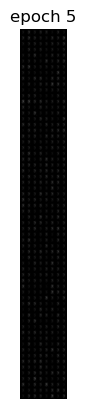

Epoch 5 of 100
Generator loss: 2.43479617, Discriminator loss: 1.08058963


118it [00:08, 14.29it/s]                         


Epoch 6 of 100
Generator loss: 2.67706374, Discriminator loss: 1.18181205


118it [00:08, 14.35it/s]                         


Epoch 7 of 100
Generator loss: 3.14159605, Discriminator loss: 0.96535105


118it [00:08, 14.22it/s]                         


Epoch 8 of 100
Generator loss: 2.72362082, Discriminator loss: 0.92724443


118it [00:08, 14.42it/s]                         


Epoch 9 of 100
Generator loss: 1.77763685, Discriminator loss: 1.16154574


118it [00:08, 14.43it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


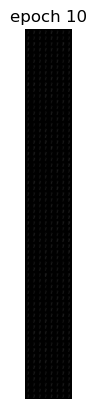

Epoch 10 of 100
Generator loss: 1.67541426, Discriminator loss: 1.13545592


118it [00:08, 14.15it/s]                         


Epoch 11 of 100
Generator loss: 2.05756068, Discriminator loss: 1.17606384


118it [00:08, 14.22it/s]                         


Epoch 12 of 100
Generator loss: 1.65454050, Discriminator loss: 0.95010638


118it [00:08, 14.22it/s]                         


Epoch 13 of 100
Generator loss: 1.21484160, Discriminator loss: 1.16106157


118it [00:08, 14.24it/s]                         


Epoch 14 of 100
Generator loss: 1.39723943, Discriminator loss: 1.13135219


118it [00:08, 14.21it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


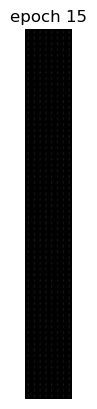

Epoch 15 of 100
Generator loss: 1.86601634, Discriminator loss: 1.02149868


118it [00:08, 14.47it/s]                         


Epoch 16 of 100
Generator loss: 1.72685164, Discriminator loss: 0.89055443


118it [00:08, 14.48it/s]                         


Epoch 17 of 100
Generator loss: 2.37928570, Discriminator loss: 0.91551046


118it [00:08, 14.27it/s]                         


Epoch 18 of 100
Generator loss: 2.76396028, Discriminator loss: 0.73136466


118it [00:08, 13.96it/s]                         


Epoch 19 of 100
Generator loss: 3.01324246, Discriminator loss: 0.78434709


118it [00:08, 13.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


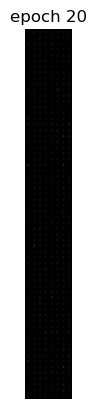

Epoch 20 of 100
Generator loss: 2.25156367, Discriminator loss: 0.90576798


118it [00:08, 14.04it/s]                         


Epoch 21 of 100
Generator loss: 2.58108988, Discriminator loss: 0.76369552


118it [00:08, 14.01it/s]                         


Epoch 22 of 100
Generator loss: 2.62703052, Discriminator loss: 0.71869142


118it [00:08, 14.05it/s]                         


Epoch 23 of 100
Generator loss: 2.72400444, Discriminator loss: 0.72230214


118it [00:08, 13.98it/s]                         


Epoch 24 of 100
Generator loss: 2.75586454, Discriminator loss: 0.69363420


118it [00:08, 13.95it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


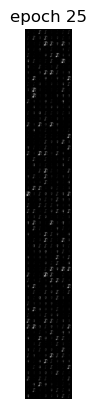

Epoch 25 of 100
Generator loss: 2.92909018, Discriminator loss: 0.75556696


118it [00:08, 13.90it/s]                         


Epoch 26 of 100
Generator loss: 2.07792183, Discriminator loss: 0.88124248


118it [00:08, 13.83it/s]                         


Epoch 27 of 100
Generator loss: 2.42572309, Discriminator loss: 0.77309753


118it [00:08, 13.78it/s]                         


Epoch 28 of 100
Generator loss: 3.04617282, Discriminator loss: 0.60706696


118it [00:08, 13.98it/s]                         


Epoch 29 of 100
Generator loss: 3.30263046, Discriminator loss: 0.67890297


118it [00:08, 13.83it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


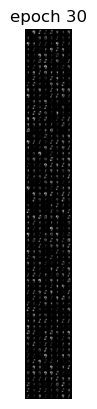

Epoch 30 of 100
Generator loss: 3.27294458, Discriminator loss: 0.71836754


118it [00:08, 13.91it/s]                         


Epoch 31 of 100
Generator loss: 3.15813128, Discriminator loss: 0.72647650


118it [00:08, 13.77it/s]                         


Epoch 32 of 100
Generator loss: 3.64906421, Discriminator loss: 0.61929740


118it [00:08, 13.61it/s]                         


Epoch 33 of 100
Generator loss: 3.47512918, Discriminator loss: 0.62350648


118it [00:08, 13.58it/s]                         


Epoch 34 of 100
Generator loss: 3.23422250, Discriminator loss: 0.64052205


118it [00:08, 13.63it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


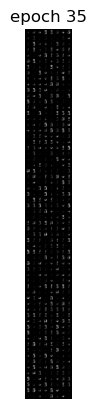

Epoch 35 of 100
Generator loss: 3.42283468, Discriminator loss: 0.58140104


118it [00:08, 13.58it/s]                         


Epoch 36 of 100
Generator loss: 3.31748799, Discriminator loss: 0.60105585


118it [00:08, 13.59it/s]                         


Epoch 37 of 100
Generator loss: 3.13722536, Discriminator loss: 0.63614954


118it [00:08, 13.54it/s]                         


Epoch 38 of 100
Generator loss: 3.16838083, Discriminator loss: 0.69410836


118it [00:08, 13.67it/s]                         


Epoch 39 of 100
Generator loss: 3.52199349, Discriminator loss: 0.67385804


118it [00:08, 13.95it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


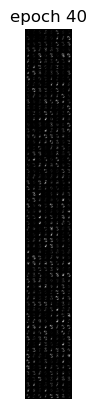

Epoch 40 of 100
Generator loss: 3.74284598, Discriminator loss: 0.59989337


118it [00:08, 13.75it/s]                         


Epoch 41 of 100
Generator loss: 3.15732107, Discriminator loss: 0.70518463


118it [00:08, 13.75it/s]                         


Epoch 42 of 100
Generator loss: 3.32611914, Discriminator loss: 0.64848682


118it [00:08, 14.02it/s]                         


Epoch 43 of 100
Generator loss: 3.45523125, Discriminator loss: 0.61091810


118it [00:08, 13.95it/s]                         


Epoch 44 of 100
Generator loss: 3.61369704, Discriminator loss: 0.57567073


118it [00:08, 13.93it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


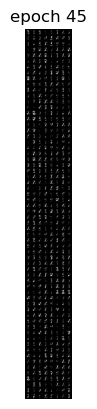

Epoch 45 of 100
Generator loss: 3.49907253, Discriminator loss: 0.55706860


118it [00:08, 13.99it/s]                         


Epoch 46 of 100
Generator loss: 3.59903119, Discriminator loss: 0.63624329


118it [00:08, 13.89it/s]                         


Epoch 47 of 100
Generator loss: 3.21405364, Discriminator loss: 0.71623399


118it [00:08, 14.25it/s]                         


Epoch 48 of 100
Generator loss: 3.03902427, Discriminator loss: 0.69638174


118it [00:08, 14.42it/s]                         


Epoch 49 of 100
Generator loss: 3.29206369, Discriminator loss: 0.63429682


118it [00:08, 14.37it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


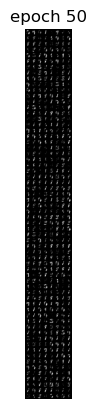

Epoch 50 of 100
Generator loss: 3.30599715, Discriminator loss: 0.67202146


118it [00:08, 14.05it/s]                         


Epoch 51 of 100
Generator loss: 3.12221025, Discriminator loss: 0.65599656


118it [00:08, 14.25it/s]                         


Epoch 52 of 100
Generator loss: 3.26909795, Discriminator loss: 0.75199043


118it [00:08, 13.68it/s]                         


Epoch 53 of 100
Generator loss: 3.31857896, Discriminator loss: 0.63775128


118it [00:08, 13.53it/s]                         


Epoch 54 of 100
Generator loss: 3.09136300, Discriminator loss: 0.62756939


118it [00:08, 14.17it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


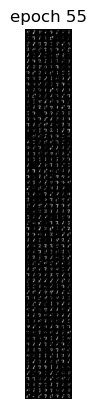

Epoch 55 of 100
Generator loss: 3.48558610, Discriminator loss: 0.63316039


118it [00:08, 13.97it/s]                         


Epoch 56 of 100
Generator loss: 3.13224991, Discriminator loss: 0.63566107


118it [00:08, 14.15it/s]                         


Epoch 57 of 100
Generator loss: 3.15675404, Discriminator loss: 0.67732313


118it [00:08, 14.09it/s]                         


Epoch 58 of 100
Generator loss: 3.16661000, Discriminator loss: 0.67360473


118it [00:08, 14.30it/s]                         


Epoch 59 of 100
Generator loss: 3.00092910, Discriminator loss: 0.70154245


118it [00:08, 14.18it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


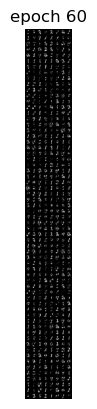

Epoch 60 of 100
Generator loss: 2.76802874, Discriminator loss: 0.72284951


118it [00:08, 13.95it/s]                         


Epoch 61 of 100
Generator loss: 2.82981555, Discriminator loss: 0.67532100


118it [00:08, 14.40it/s]                         


Epoch 62 of 100
Generator loss: 2.89972522, Discriminator loss: 0.68787276


118it [00:08, 14.29it/s]                         


Epoch 63 of 100
Generator loss: 2.76601903, Discriminator loss: 0.74938293


118it [00:08, 14.00it/s]                         


Epoch 64 of 100
Generator loss: 2.94106720, Discriminator loss: 0.67275114


118it [00:08, 14.25it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


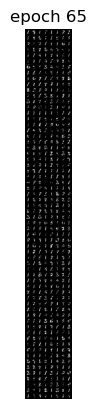

Epoch 65 of 100
Generator loss: 2.78161931, Discriminator loss: 0.76044826


118it [00:08, 14.05it/s]                         


Epoch 66 of 100
Generator loss: 2.86022701, Discriminator loss: 0.69892196


118it [00:08, 14.06it/s]                         


Epoch 67 of 100
Generator loss: 2.77177338, Discriminator loss: 0.70543641


118it [00:08, 14.24it/s]                         


Epoch 68 of 100
Generator loss: 2.75702837, Discriminator loss: 0.70316549


118it [00:08, 14.26it/s]                         


Epoch 69 of 100
Generator loss: 2.65066319, Discriminator loss: 0.76083419


118it [00:08, 14.03it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


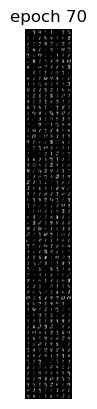

Epoch 70 of 100
Generator loss: 2.75071805, Discriminator loss: 0.72926882


118it [00:08, 13.83it/s]                         


Epoch 71 of 100
Generator loss: 2.81268671, Discriminator loss: 0.71609035


118it [00:08, 13.74it/s]                         


Epoch 72 of 100
Generator loss: 2.79317045, Discriminator loss: 0.74015985


118it [00:08, 14.09it/s]                         


Epoch 73 of 100
Generator loss: 2.59711951, Discriminator loss: 0.77131586


118it [00:08, 13.88it/s]                         


Epoch 74 of 100
Generator loss: 2.54933950, Discriminator loss: 0.78322937


118it [00:08, 13.67it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


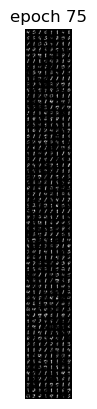

Epoch 75 of 100
Generator loss: 2.62588686, Discriminator loss: 0.79157302


118it [00:08, 14.14it/s]                         


Epoch 76 of 100
Generator loss: 2.76817727, Discriminator loss: 0.73289357


118it [00:08, 14.28it/s]                         


Epoch 77 of 100
Generator loss: 2.71133053, Discriminator loss: 0.72484969


118it [00:08, 14.24it/s]                         


Epoch 78 of 100
Generator loss: 2.68919987, Discriminator loss: 0.75242635


118it [00:08, 14.30it/s]                         


Epoch 79 of 100
Generator loss: 2.61378349, Discriminator loss: 0.74597568


118it [00:08, 14.27it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


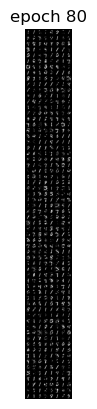

Epoch 80 of 100
Generator loss: 2.69784524, Discriminator loss: 0.75499952


118it [00:08, 14.29it/s]                         


Epoch 81 of 100
Generator loss: 2.65653187, Discriminator loss: 0.79865472


118it [00:08, 14.25it/s]                         


Epoch 82 of 100
Generator loss: 2.57650464, Discriminator loss: 0.78209667


118it [00:08, 14.26it/s]                         


Epoch 83 of 100
Generator loss: 2.50067002, Discriminator loss: 0.73929208


118it [00:08, 14.24it/s]                         


Epoch 84 of 100
Generator loss: 2.73339131, Discriminator loss: 0.73663829


118it [00:08, 13.75it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


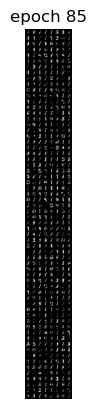

Epoch 85 of 100
Generator loss: 2.63086737, Discriminator loss: 0.77885374


118it [00:08, 13.43it/s]                         


Epoch 86 of 100
Generator loss: 2.53344348, Discriminator loss: 0.77390332


118it [00:08, 13.63it/s]                         


Epoch 87 of 100
Generator loss: 2.51549647, Discriminator loss: 0.78281027


118it [00:08, 13.53it/s]                         


Epoch 88 of 100
Generator loss: 2.57365404, Discriminator loss: 0.78410580


118it [00:08, 13.29it/s]                         


Epoch 89 of 100
Generator loss: 2.49070525, Discriminator loss: 0.80451968


118it [00:08, 13.85it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


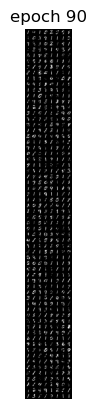

Epoch 90 of 100
Generator loss: 2.37502654, Discriminator loss: 0.80219895


118it [00:08, 14.23it/s]                         


Epoch 91 of 100
Generator loss: 2.46881001, Discriminator loss: 0.77860676


118it [00:08, 14.25it/s]                         


Epoch 92 of 100
Generator loss: 2.40790313, Discriminator loss: 0.80988844


118it [00:08, 14.00it/s]                         


Epoch 93 of 100
Generator loss: 2.40472707, Discriminator loss: 0.80252890


118it [00:08, 13.43it/s]                         


Epoch 94 of 100
Generator loss: 2.26307847, Discriminator loss: 0.83216265


118it [00:08, 13.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


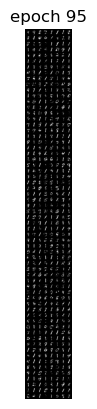

Epoch 95 of 100
Generator loss: 2.27903070, Discriminator loss: 0.86551313


118it [00:09, 12.88it/s]                         


Epoch 96 of 100
Generator loss: 2.13910407, Discriminator loss: 0.89620580


118it [00:08, 13.66it/s]                         


Epoch 97 of 100
Generator loss: 2.13026743, Discriminator loss: 0.87771237


118it [00:08, 13.70it/s]                         


Epoch 98 of 100
Generator loss: 1.99313140, Discriminator loss: 0.91086487


118it [00:08, 14.03it/s]                         


Epoch 99 of 100
Generator loss: 2.13042000, Discriminator loss: 0.86077120


118it [00:08, 13.81it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


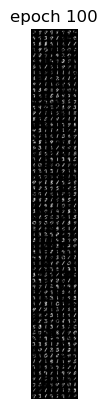

Epoch 100 of 100
Generator loss: 2.13157730, Discriminator loss: 0.88891505


In [224]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################

# label smoothing for part c
def label_smooth(label):
    noise = torch.rand_like(label)
    return label - 0.3 + (noise * 0.5)


for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        # part a & b
        discriminator.zero_grad()
        real_images = data[0].to(device)
        real_labels = label_real(real_images.size(0))
        real_labels = label_smooth(real_labels) # part c
        output_real = discriminator(real_images)
        loss_real = discriminator_loss(output_real, real_labels)

        noise = create_noise(batch_size, nz)
        fake_images = generator(noise)
        fake_labels = label_fake(fake_images.size(0))
        output_fake = discriminator(fake_images.detach())
        loss_fake = discriminator_loss(output_fake, fake_labels)
        d_loss = loss_fake+loss_real
        d_loss.backward()
        optim_d.step()
        loss_d += d_loss.item()

        generator.zero_grad()
        generated_images = generator(noise)
        output_fake = discriminator(generated_images)

        g_loss = generator_loss(output_fake, label_real(batch_size)) # part a
        # g_loss = generator_loss(output_fake, label_fake(batch_size)) # part b

        g_loss.backward()
        optim_g.step()
        loss_g += g_loss.item()

    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [225]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [226]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

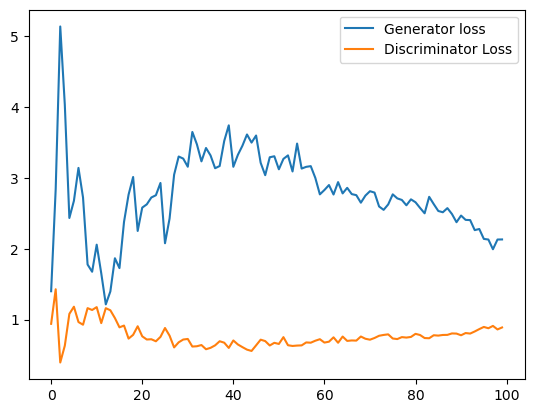

In [227]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')